<a href="https://colab.research.google.com/github/KwameNtaadu007/ML/blob/main/Distributions_and_Uncertainty_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. We identified house pricing dataset from Kaggle

2. **Data Exploration:**
*   We explore the dataset with pandas to understand its structure and assess summary statistics ncluding mean, median, standard deviation, and range for key variables
*   Describe the variables of interest and their distributions using histograms or density plots as a preliminary step.




3. **Visualization Techniques:**
Choose at least two advanced visualization techniques suitable for representing distributions and uncertainty:

    *   Error Bars and Confidence Intervals: Highlight variability or margins of error around data points or means.
    *   Box-and-Whisker Plots: Show data spread, medians, and potential outliers.
    *   Violin Plots: Provide insights into data density and distribution shape.

Justify your choices based on the dataset’s characteristics and the audience’s needs.


4. **Visualization Creation:**
 Create the visualizations using tools like matplotlib or seaborn (Python), ggplot2 (R), or Tableau. Ensure visualizations are:
Well-labeled, with clear axes titles, legends, and appropriate scales.
Accompanied by an informative title and any necessary explanatory notes.
Accessible, with colorblind-friendly palettes and legible fonts.



In [ ]:
# Libraries for data manipulation, visualization, and analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np



---

### Suggested Markdown for Presentation
#### Data Wrangling
- **Objective**: Clean the dataset by removing duplicates and handling missing values.
- **Process**:
  1. Load the dataset.
  2. Identify and remove duplicate rows.
  3. Check for missing values and handle them (drop rows if few).



In [ ]:
def wrangle(filepath):
    """
    Reads a CSV file, cleans it by removing duplicates and null values, and returns the cleaned DataFrame.

    Args:
        filepath (str): Path to the CSV file.

    Returns:
        pandas.DataFrame: Cleaned DataFrame.
    """
    # Load the dataset
    df = pd.read_csv(filepath)

    # Check for duplicates
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        print(f"Removed {num_duplicates} duplicate rows.")
        df = df.drop_duplicates()

    # Check and handle missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing values found:")
        print(missing_values)

        # Drop rows with missing values
        df.dropna(inplace=True)

    return df

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/DUR_NY_Housing.csv"
df = wrangle(file_path)

#### Data Exploration
- **Objective**: Understand the dataset’s structure and variables using descriptive statistics.
- **Key Insights**:
  - **Dataset Shape**: Number of rows and columns.
  - **Statistical Summary**:
    - Central tendency (mean, median).
    - Variability (standard deviation, interquartile range).
    - Quantiles and range.


In [ ]:
# Display dataset structure and key statistics
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nSummary Statistics:\n", df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].describe())

# Additional details
print(df.info())
print("\nMedian Price:", df['PRICE'].median())
print("Mean Price:", df['PRICE'].mean())
print("Standard Deviation of Price:", df['PRICE'].std())
print("Range of Prices:", df['PRICE'].min(), "to", df['PRICE'].max())
print("99% Quantile:", df['PRICE'].quantile(0.99))
print("75% Quantile:", df['PRICE'].quantile(0.75))
print("25% Quantile:", df['PRICE'].quantile(0.25))
print("Interquartile Range (IQR):", df['PRICE'].quantile(0.75) - df['PRICE'].quantile(0.25))
print("Mode of Property Size:", df['PROPERTYSQFT'].mode())



Dataset Shape: (3440, 17)

Columns: Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

Summary Statistics:
               PRICE         BEDS         BATH  PROPERTYSQFT
count  3.440000e+03  3440.000000  3440.000000   3440.000000
mean   6.898547e+05     2.878779     1.880215   1698.684169
std    3.480658e+05     1.797097     1.036752    752.006798
min    2.494000e+03     1.000000     0.000000    230.000000
25%    3.990000e+05     2.000000     1.000000   1016.500000
50%    6.550000e+05     3.000000     2.000000   1914.000000
75%    9.250000e+05     3.000000     2.000000   2184.207862
max    1.498000e+06    16.000000     9.000000   6240.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 17 columns):
 #   Column 

### Histograms and Density Plots: Housing Price and Property Size

---

#### **Housing Price Distribution**

**Objective**: Explore the distribution of housing prices in the dataset and identify key summary statistics such as the mean, minimum, and maximum values.

- **Histogram**:
  - The histogram visualizes the frequency of housing prices.
  - The mean price is indicated by an orange dashed line for reference.
  - Title highlights the range of prices, showing the minimum and maximum values.

**Interpretation**:
- The distribution shows the frequency of housing prices across different ranges.
- Outliers or unusually high-priced properties may distort the mean.
- The majority of properties cluster within a certain price range.

---

---

These visualizations allow for a deeper understanding of housing price and property size distributions, enabling insights into central tendencies, variability, and the presence of outliers.

Median Price: 655000.0
Mean Price: 689854.7255813953
Standard Deviation of Price: 348065.82555436576
Range of Prices: 2494 to 1498000
99% quantile: 1450000.0
75% quantile: 925000.0
25% quantile: 399000.0
Interquartile Range (IQR): 526000.0


(1,)


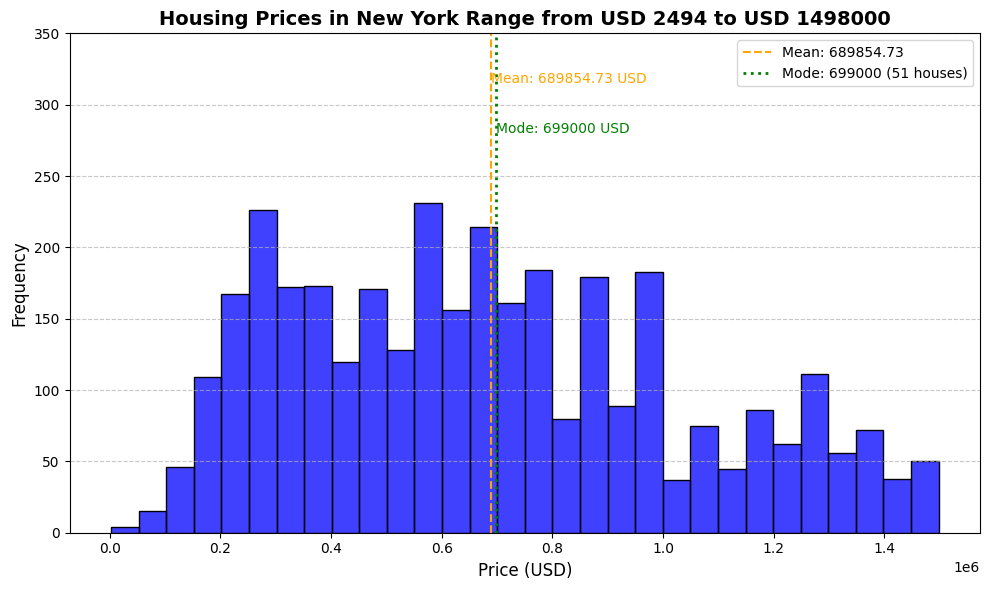

In [ ]:
# Calculate statistics
mean_val = df['PRICE'].mean()
min_val = df['PRICE'].min()
max_val = df['PRICE'].max()
price_mode = df['PRICE'].mode().iloc[0]
price_mode_count = (df[df['PRICE'] == price_mode]['PRICE']).count()
print(df['PRICE'].mode().shape)
# File name for saving the plot
output_file = "housing_price_histogram.png"

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'], bins=30, kde=False, color='blue', edgecolor='black')

# Add mean and mode indicators
plt.axvline(mean_val, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(price_mode, color='green', linestyle='dotted', linewidth=2, label=f'Mode: {price_mode:.0f} ({price_mode_count} houses)')

# Add title and labels
plt.title(f'Housing Prices in New York Range from USD {min_val} to USD {max_val}', fontsize=14, weight='bold')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize ticks and grid
plt.xticks(range(0, int(max_val) + 100000, 200000))
plt.yticks(range(0, 400, 50))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
plt.text(mean_val, plt.ylim()[1] * 0.9, f'Mean: {mean_val:.2f} USD', color='orange', fontsize=10)
plt.text(price_mode, plt.ylim()[1] * 0.8, f'Mode: {price_mode:.0f} USD', color='green', fontsize=10)

# Add legend
plt.legend()

# Save the plot as a high-resolution PNG file
plt.savefig(output_file, format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
print((df[df['PRICE'] == price_mode]).info(),'price mode :',price_mode)

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 39 to 3402
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  51 non-null     object 
 1   TYPE                         51 non-null     object 
 2   PRICE                        51 non-null     int64  
 3   BEDS                         51 non-null     int64  
 4   BATH                         51 non-null     float64
 5   PROPERTYSQFT                 51 non-null     float64
 6   ADDRESS                      51 non-null     object 
 7   STATE                        51 non-null     object 
 8   MAIN_ADDRESS                 51 non-null     object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  51 non-null     object 
 10  LOCALITY                     51 non-null     object 
 11  SUBLOCALITY                  51 non-null     object 
 12  STREET_NAME                  51 non-null     object 
 13  LONG_NAME               


#### **Density Plot for Housing Price**

**Objective**: Visualize the shape and spread of the housing price distribution using a density plot.

- **Features**:
  - The density plot provides a smooth, continuous estimate of the distribution.
  - The mean price is marked with an orange dashed line.
  - Title and labels clarify the content of the plot.

**Interpretation**:
- The density curve highlights where prices are most concentrated.
- The tail of the distribution may indicate outliers or luxury properties.

---

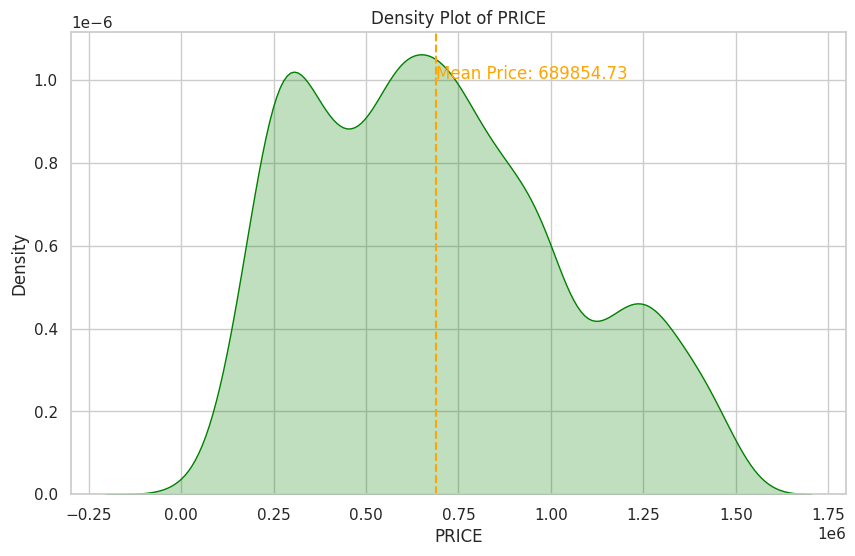

In [ ]:
# Density Plot for Price

plt.figure(figsize=(10, 6))
sns.kdeplot(df['PRICE'], fill=True, color='green')
plt.axvline(mean_val, color='orange', linestyle='dashed', linewidth=1.5)
plt.text(mean_val, plt.ylim()[1] * 0.9, f'Mean Price: {mean_val:.2f}', color='orange')
plt.title('Density Plot of PRICE')
plt.xlabel('PRICE')
plt.ylabel('Density')
plt.show()



#### **Property Size Distribution**

**Objective**: Examine the distribution of property sizes (`PROPERTYSQFT`) and understand its variability.

- **Histogram**:
  - Displays the frequency of property sizes (square feet) in the dataset.
  - The mean property size is marked with an orange dashed line.
  - Title highlights the range from the smallest to the largest properties.

**Interpretation**:
- Most properties fall within a specific size range, with some larger properties skewing the distribution.
- The histogram provides an overview of how property sizes are distributed.

---


In [ ]:
filtered_df = df[(df['PROPERTYSQFT'] > 2000) & (df['PROPERTYSQFT'] < 2500)]
filtered_df

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,1.442000e+03,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,7.066883e+05,2.991678,1.890873,2190.974716,40.723011,-73.909396
std,3.542736e+05,1.815559,1.029248,51.349485,0.077756,0.096823
min,2.494000e+03,1.000000,1.000000,2002.000000,40.501789,-74.246109
25%,3.990000e+05,2.000000,1.000000,2184.207862,40.675482,-73.966432
50%,6.914500e+05,3.000000,2.000000,2184.207862,40.731896,-73.905566
75%,9.500000e+05,4.000000,2.373861,2184.207862,40.768935,-73.847006
max,1.495000e+06,16.000000,9.000000,2487.000000,40.909252,-73.702450


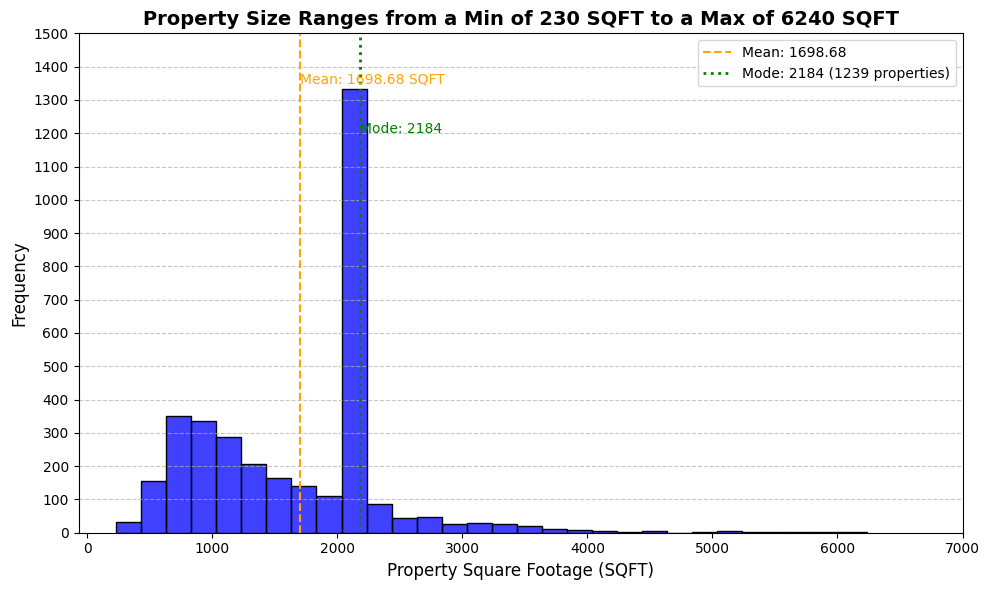

In [ ]:
# Calculate statistics
mean_val = df['PROPERTYSQFT'].mean()
min_val = df['PROPERTYSQFT'].min()
max_val = df['PROPERTYSQFT'].max()
property_mode = df['PROPERTYSQFT'].mode().iloc[0]
property_mode_count = (df[df['PROPERTYSQFT'] == property_mode]['PROPERTYSQFT']).count()

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['PROPERTYSQFT'], bins=30, kde=False, color='blue', edgecolor='black')

# Add mean and mode indicators
plt.axvline(mean_val, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(property_mode, color='green', linestyle='dotted', linewidth=2, label=f'Mode: {property_mode:.0f} ({property_mode_count} properties)')

# Add title and labels
plt.title(f'Property Size Ranges from a Min of {min_val:.0f} SQFT to a Max of {max_val:.0f} SQFT', fontsize=14, weight='bold')
plt.xlabel('Property Square Footage (SQFT)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize ticks and grid
plt.xticks(range(0, int(max_val) + 1000, 1000))
plt.yticks(range(0, 1600, 100))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
plt.text(mean_val, plt.ylim()[1] * 0.9, f'Mean: {mean_val:.2f} SQFT', color='orange', fontsize=10)
plt.text(property_mode, plt.ylim()[1] * 0.8, f'Mode: {property_mode:.0f}', color='green', fontsize=10)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



#### **Density Plot for Property Size**

**Objective**: Understand the shape and spread of the property size distribution.

- **Features**:
  - A smooth density curve highlights where property sizes are concentrated.
  - The mean property size is marked for reference.
  - Title and axes explain the plot.

**Interpretation**:
- The density plot shows a more detailed view of the property size distribution compared to the histogram.
- Peaks indicate common property sizes, while tails represent outliers.

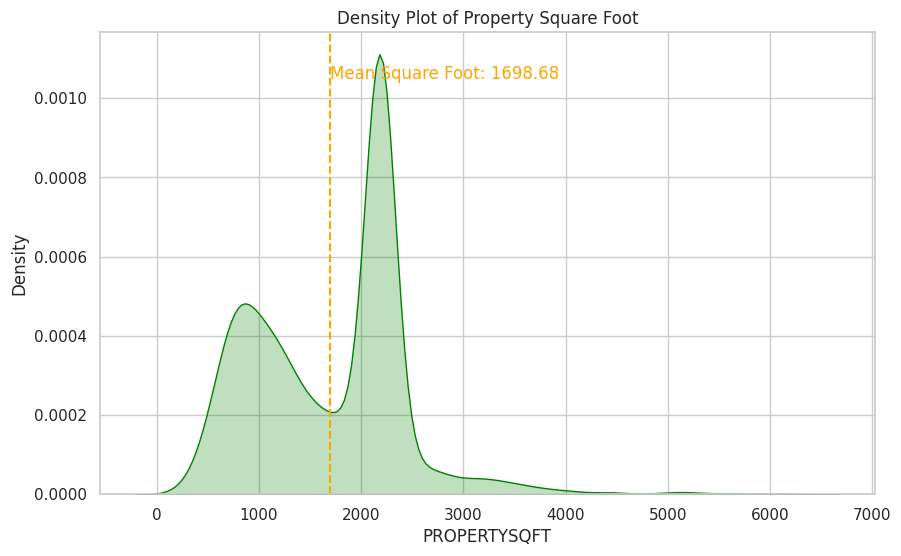

In [ ]:
# Price distribution for propertysqft
plt.figure(figsize=(10, 6))
sns.kdeplot(df['PROPERTYSQFT'], fill=True, color='green')
plt.axvline(mean_val, color='orange', linestyle='dashed', linewidth=1.5)
plt.text(mean_val, plt.ylim()[1] * 0.9, f'Mean Square Foot: {mean_val:.2f}', color='orange')
plt.title('Density Plot of Property Square Foot')
plt.xlabel('PROPERTYSQFT')
plt.ylabel('Density')
plt.show()


In [ ]:
sqft_mode = (df[df['PROPERTYSQFT'] == df['PROPERTYSQFT'].mode().iloc[0]]['PROPERTYSQFT'])
print("Mode of Property Size:", sqft_mode,sqft_mode.count())

Mode of Property Size: 4       2184.207862
9       2184.207862
10      2184.207862
11      2184.207862
22      2184.207862
           ...     
3431    2184.207862
3433    2184.207862
3435    2184.207862
3436    2184.207862
3437    2184.207862
Name: PROPERTYSQFT, Length: 1239, dtype: float64 1239


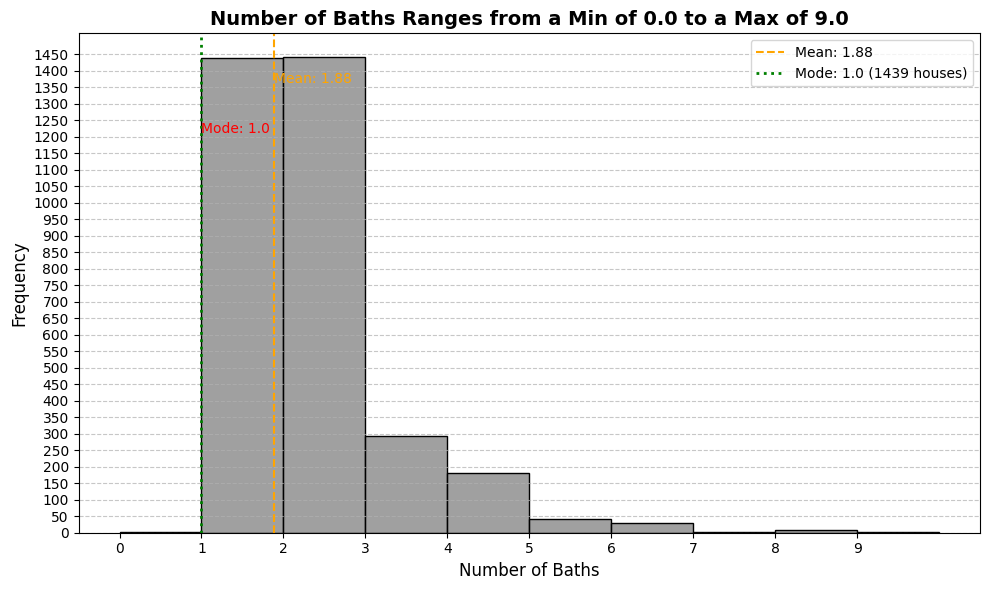

Mode of Bath: 1439 occurrences of 1.0 baths


In [ ]:
# Calculate statistics
mean_val = df['BATH'].mean()
min_val = df['BATH'].min()
max_val = df['BATH'].max()
bath_mode = df['BATH'].mode().iloc[0]
bath_mode_count = (df[df['BATH'] == bath_mode]['BATH']).count()

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['BATH'], bins=range(int(min_val), int(max_val) + 2), kde=False, color='gray', edgecolor='black')

# Add mean and mode indicators
plt.axvline(mean_val, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(bath_mode, color='green', linestyle='dotted', linewidth=2, label=f'Mode: {bath_mode} ({bath_mode_count} houses)')

# Add title and labels
plt.title(f'Number of Baths Ranges from a Min of {min_val} to a Max of {max_val}', fontsize=14, weight='bold')
plt.xlabel('Number of Baths', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize ticks and grid
plt.xticks(range(int(min_val), int(max_val) + 1))
plt.yticks(range(0, 1500, 50))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
plt.text(mean_val, plt.ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', color='orange', fontsize=10)
plt.text(bath_mode, plt.ylim()[1] * 0.8, f'Mode: {bath_mode}', color='red', fontsize=10)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print mode details
print(f"Mode of Bath: {bath_mode_count} occurrences of {bath_mode} baths")

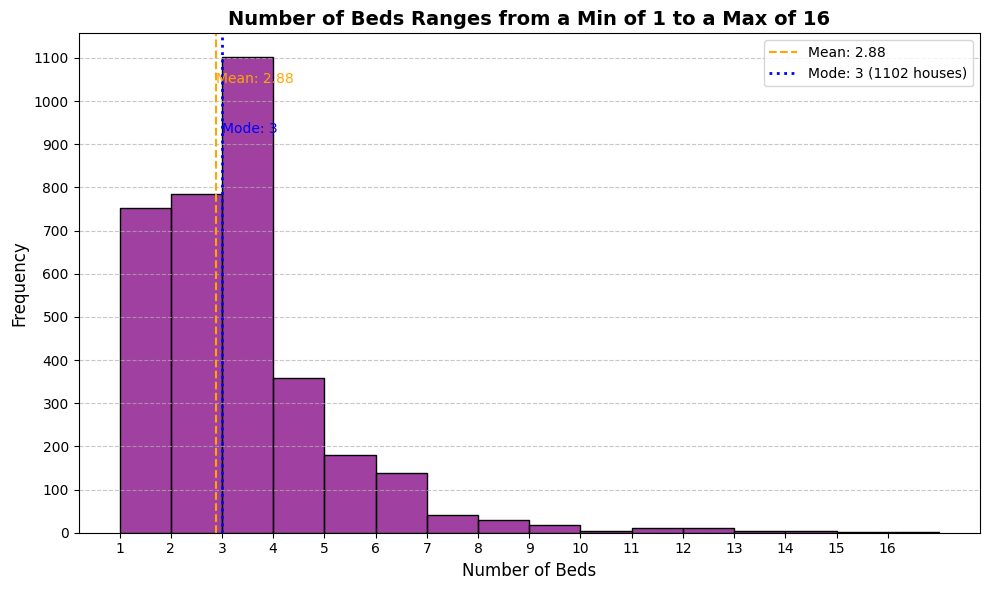

In [ ]:
# Calculate statistics
mean_val = df['BEDS'].mean()
min_val = df['BEDS'].min()
max_val = df['BEDS'].max()
beds_mode = df['BEDS'].mode().iloc[0]
beds_mode_count = (df[df['BEDS'] == beds_mode]['BEDS']).count()

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['BEDS'], bins=range(int(min_val), int(max_val) + 2), kde=False, color='purple', edgecolor='black')

# Add mean and mode indicators
plt.axvline(mean_val, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(beds_mode, color='blue', linestyle='dotted', linewidth=2, label=f'Mode: {beds_mode} ({beds_mode_count} houses)')

# Add title and labels
plt.title(f'Number of Beds Ranges from a Min of {min_val} to a Max of {max_val}', fontsize=14, weight='bold')
plt.xlabel('Number of Beds', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize ticks and grid
plt.xticks(range(int(min_val), int(max_val) + 1))
plt.yticks(range(0, 1200, 100))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
plt.text(mean_val, plt.ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', color='orange')
plt.text(beds_mode, plt.ylim()[1] * 0.8, f'Mode: {beds_mode}', color='blue')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Box-and-Whisker Plots
- **What the Plot Shows**:
  - **Median**: The horizontal line inside the box represents the median value of the feature.
  - **Interquartile Range (IQR)**: The box spans from the 25th percentile (Q1) to the 75th percentile (Q3).
  - **Whiskers**: Lines extending from the box indicate the range of data within 1.5×IQR from Q1 and Q3.
  - **Outliers**: Points beyond the whiskers are considered outliers.

- **Purpose**:
  - Provides a visual summary of the distribution.
  - Highlights central tendency, spread, and potential outliers.
  - Useful for comparing multiple variables.

- **Customization**:
  - Colors are chosen to be accessible (e.g., colorblind-friendly palettes).
  - Titles and labels improve clarity for the audience.

This visualization is suitable for presenting data variability and identifying outliers for decision-making as you can see in below

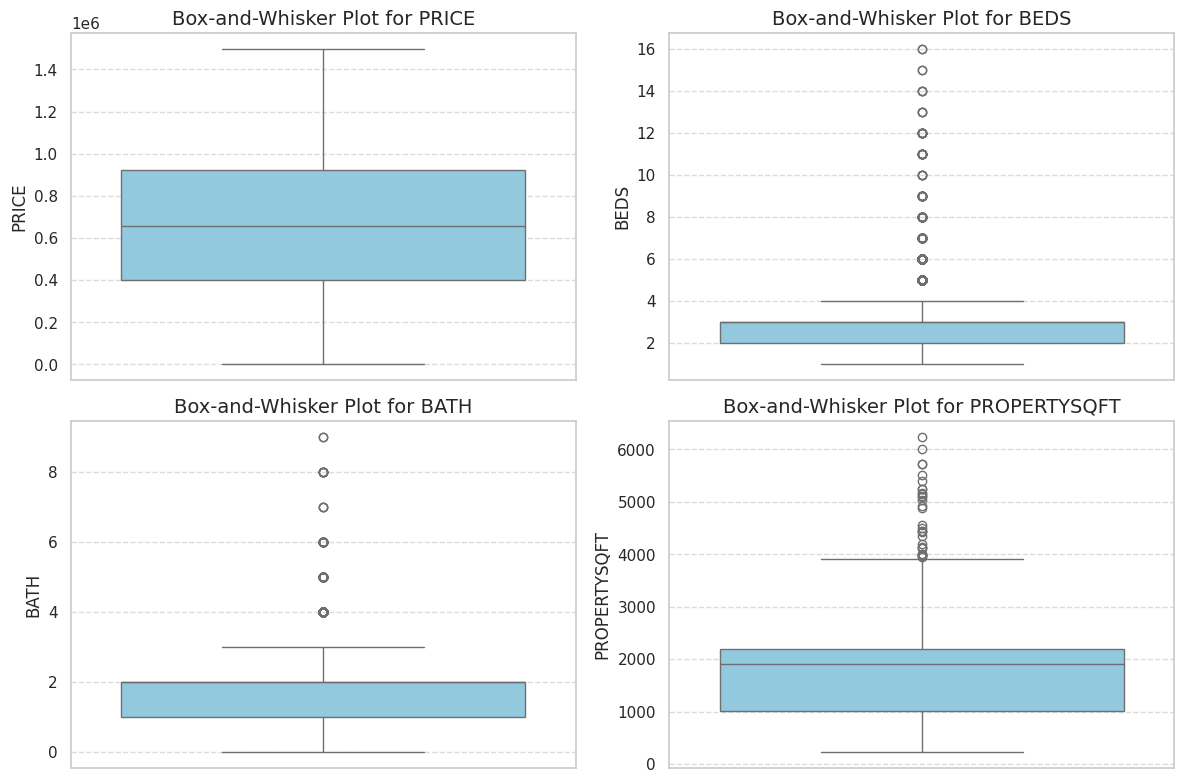

In [ ]:
# Features to plot
features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

# Setting up the figure
plt.figure(figsize=(12, 8))

# Creating a Box-and-Whisker Plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=feature, color='skyblue')
    plt.title(f'Box-and-Whisker Plot for {feature}', fontsize=14)
    plt.ylabel(feature, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


### Explanation for Violin Plots

- **What the Plot Shows**:
  - **Distribution Shape**: Displays the full distribution of the data, showing both peaks and valleys.
  - **Density Estimation**: The width of the violin at a given value represents the data density.
  - **Symmetry**: Offers an intuitive sense of the distribution symmetry or skewness.

- **Purpose**:
  - **Detailed Insights**: Goes beyond summary statistics by showing the data's full distribution.
  - **Comparison Across Groups**: Useful for comparing multiple groups or categories side by side.

- **Customization**:
  - Colors and fonts are selected for clarity and accessibility.
  - Titles and labels improve communication and usability.

---

The **Violin Plots** complement **Box-and-Whisker Plots** by adding density information, which is valuable for exploring underlying data patterns. Let me know if you’d like further refinements!

<ipython-input-77-7ce60167c2ca>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-77-7ce60167c2ca>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-77-7ce60167c2ca>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-77-7ce60167c2ca>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


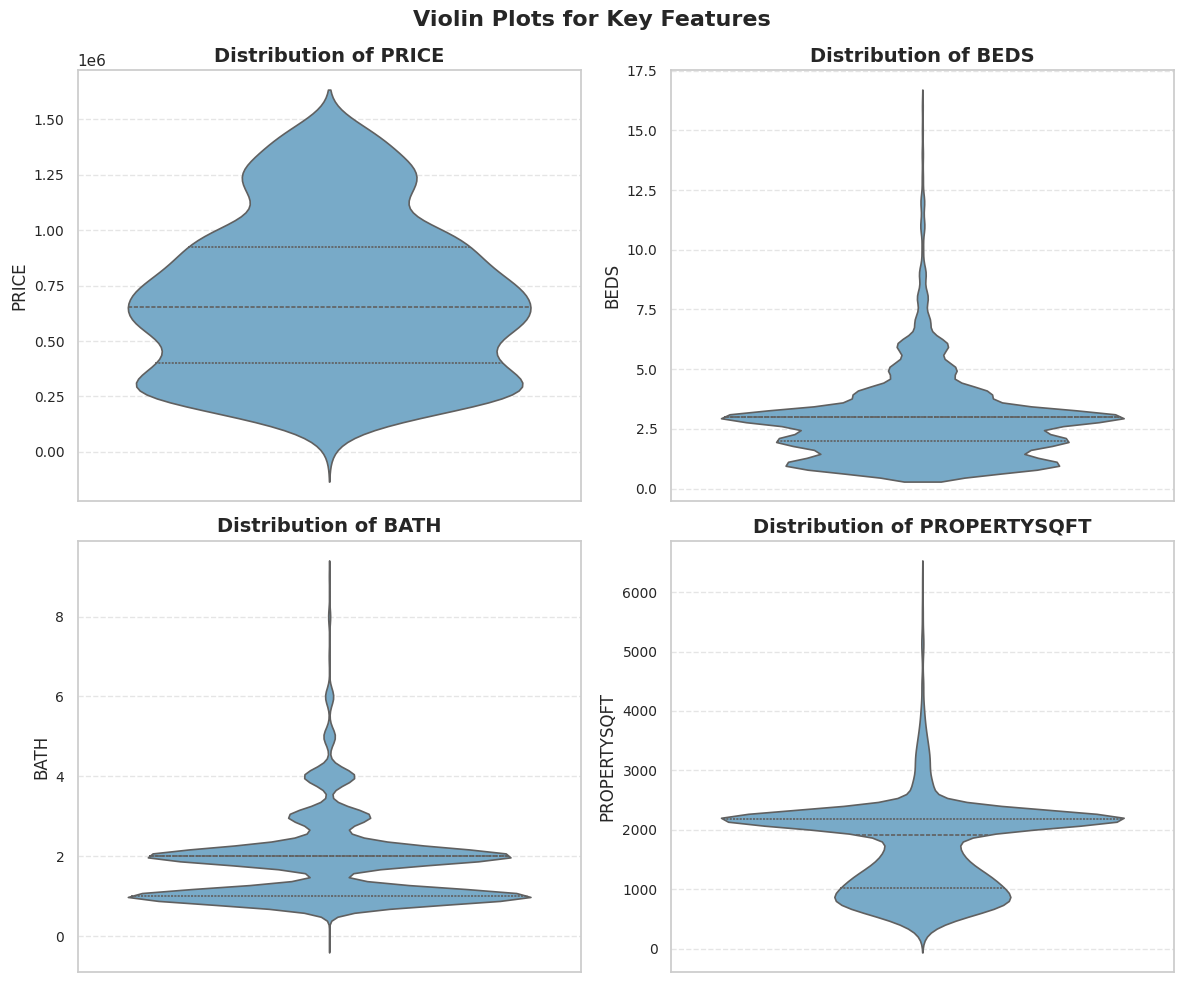

In [ ]:

# Features to plot
features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

# Setting up the figure
plt.figure(figsize=(12, 10))

# Creating a Violin Plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)

    # Violin plot with enhancements
    sns.violinplot(
        data=df,
        y=feature,
        palette="Blues",  # Use a palette for gradient coloring
        inner="quartile",  # Show quartiles inside the violin
        linewidth=1.2  # Thicker violin edges for clarity
    )

    # Customizations
    plt.title(f'Distribution of {feature}', fontsize=14, weight='bold')
    plt.ylabel(feature, fontsize=12)
    plt.xlabel('')  # Remove x-label
    plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add soft gridlines
    plt.tick_params(axis='both', which='major', labelsize=10)  # Adjust tick size

# Adjust layout for better readability
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('Violin Plots for Key Features', fontsize=16, weight='bold')

# Show the plot
plt.show()



### Explanation for Error Bars and Confidence Intervals

- **What the Plot Shows**:
  - **Error Bars**: Represent the variability of data points (e.g., standard error or standard deviation).
  - **Confidence Intervals (CI)**: Shaded or capped areas that estimate the range within which the true mean lies (e.g., 95% CI indicates a 95% probability that the true mean is within the interval).

- **Purpose**:
  - Communicate uncertainty or variability around the mean or other summary statistics.
  - Useful for understanding trends and comparisons while accounting for uncertainty.

- **Customization**:
  - The `ci` parameter adjusts the confidence level.
  - `capsize` adds caps to the error bars for clarity.
  - Log transformation (`np.log1p`) is applied to reduce skewness in data like prices.

---

This method is ideal for audience members needing to understand not just trends but also the reliability and uncertainty around the presented data.

<ipython-input-79-9ce250231554>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
<ipython-input-79-9ce250231554>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(
<ipython-input-79-9ce250231554>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(


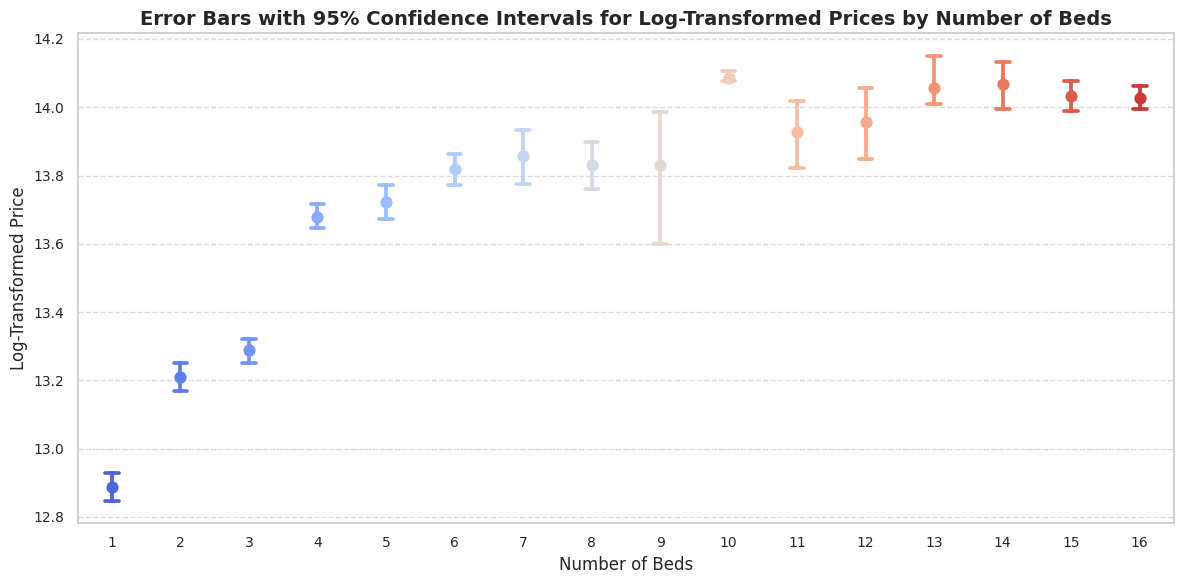

In [ ]:
# Simulate some data for demonstration
df['PRICE_LOG'] = np.log1p(df['PRICE'])  # Log transformation for better scale

# Enhanced Error Bar Plot using Seaborn
plt.figure(figsize=(12, 6))

sns.pointplot(
    x='BEDS',
    y='PRICE_LOG',
    data=df,
    ci=95,  # Confidence interval of 95%
    join=True,
    palette="coolwarm",  # Use a vibrant color palette
    capsize=0.2,  # Size of error bar caps
    markers='o',  # Circular markers for points
    linestyles='-'  # Solid line connecting points
)

# Titles and labels
plt.title("Error Bars with 95% Confidence Intervals for Log-Transformed Prices by Number of Beds",
          fontsize=14, weight='bold')
plt.xlabel("Number of Beds", fontsize=12)
plt.ylabel("Log-Transformed Price", fontsize=12)

# Gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()


**FEATURE EXAMINATION**

Analyze relationships between feature matrices and the target variable (Price).

correlation                  PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.479002  0.569906      0.391407 -0.116652  -0.118799
BEDS          0.479002  1.000000  0.740764      0.513653 -0.088407   0.021398
BATH          0.569906  0.740764  1.000000      0.510562 -0.154973  -0.043518
PROPERTYSQFT  0.391407  0.513653  0.510562      1.000000 -0.004886   0.050477
LATITUDE     -0.116652 -0.088407 -0.154973     -0.004886  1.000000   0.551435
LONGITUDE    -0.118799  0.021398 -0.043518      0.050477  0.551435   1.000000


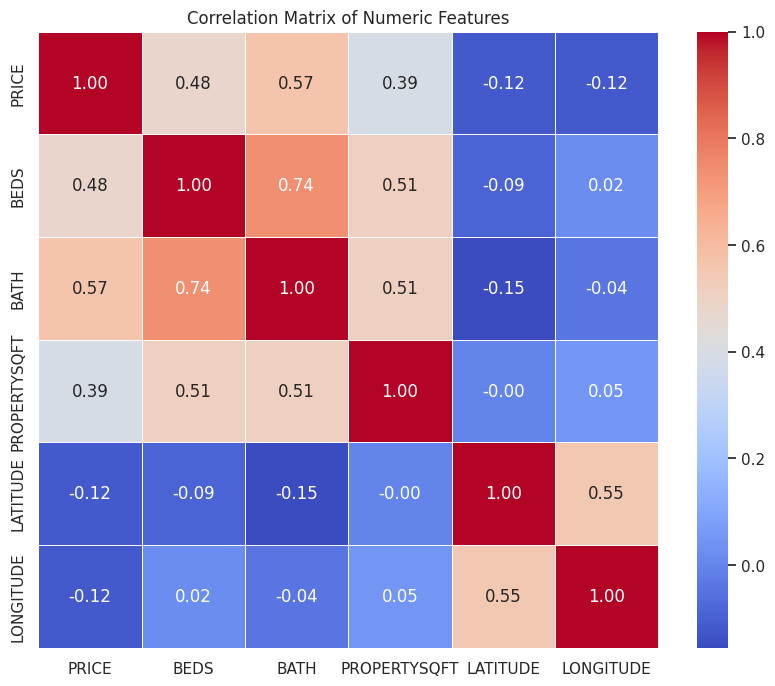

In [ ]:
# Encoding the 'TYPE' feature

# Selecting numeric columns for correlation analysis
numeric_features = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']]

# Calculating the correlation matrix
corr_matrix = numeric_features.corr()
print('correlation',corr_matrix)
# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


**The correlation matrix reveals the following:**

**Strong correlations:**
*   PRICE and BATH (strong positive correlation).
*   PROPERTYSQFT and BEDS (strong positive correlation).
*   PROPERTYSQFT and BATH (strong positive correlation).


**Moderate correlations:**
*   PRICE and BATH (moderate positive correlation).
*   Geographic coordinates (LATITUDE, LONGITUDE) show weak correlations with PRICE.


Key Insights:
*   Features like PROPERTYSQFT, BEDS, and BATH are strongly linked to price and
*   Geographic and categorical features may still contribute via non-linear relationships.




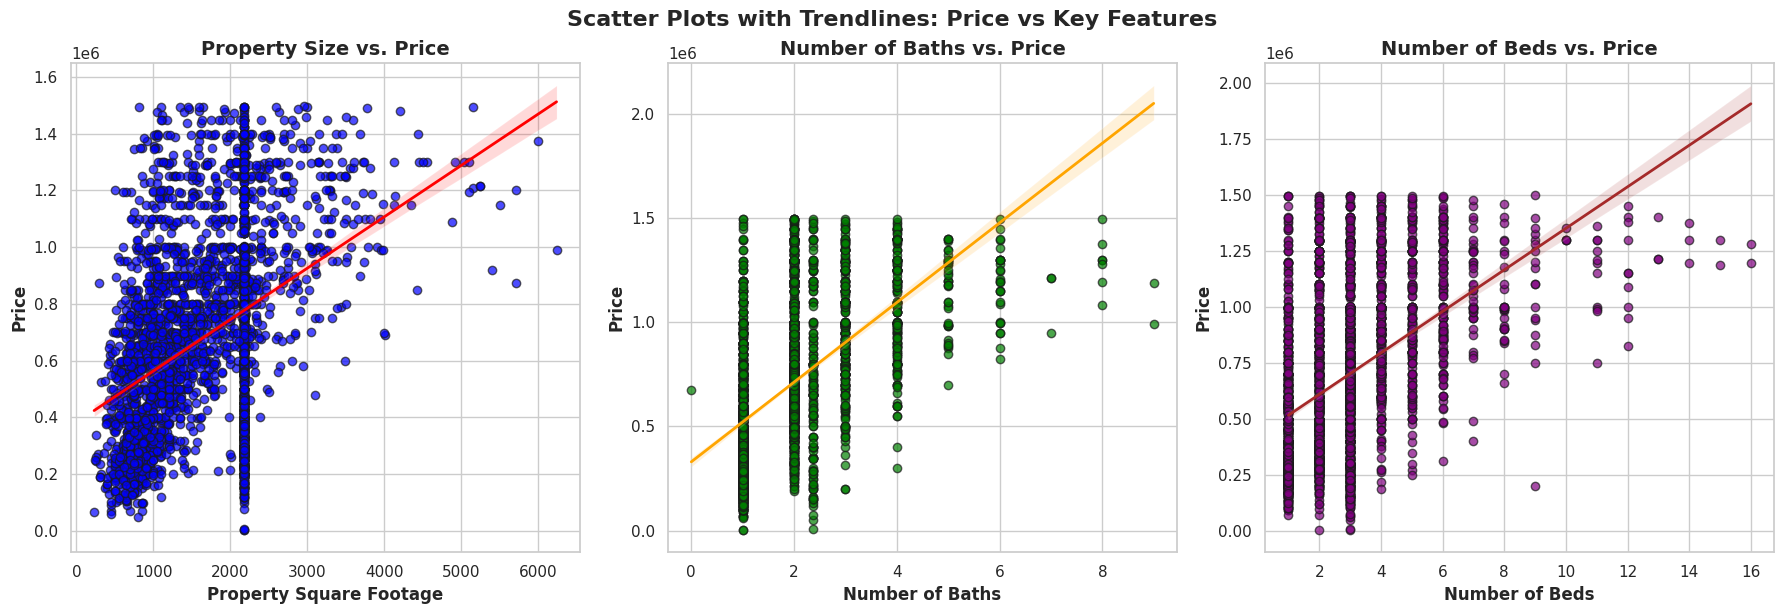

In [ ]:
# Assuming you have already created the filtered DataFrame (df_price_upto_75)

# Set the style
sns.set_theme(style="whitegrid")

# Using subplots for better control
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Scatter Plot: Property Square Footage vs. Price
axes[0].scatter(df['PROPERTYSQFT'], df['PRICE'], alpha=0.7, color='blue', edgecolor='k')
sns.regplot(x='PROPERTYSQFT', y='PRICE', data=df, ax=axes[0], scatter=False, color='red', line_kws={"linewidth": 2})
axes[0].set_xlabel('Property Square Footage', fontsize=12, weight='bold')
axes[0].set_ylabel('Price', fontsize=12, weight='bold')
axes[0].set_title('Property Size vs. Price', fontsize=14, weight='bold')

# Scatter Plot: Number of Baths vs. Price
axes[1].scatter(df['BATH'], df['PRICE'], alpha=0.7, color='green', edgecolor='k')
sns.regplot(x='BATH', y='PRICE', data=df, ax=axes[1], scatter=False, color='orange', line_kws={"linewidth": 2})
axes[1].set_xlabel('Number of Baths', fontsize=12, weight='bold')
axes[1].set_ylabel('Price', fontsize=12, weight='bold')
axes[1].set_title('Number of Baths vs. Price', fontsize=14, weight='bold')

# Scatter Plot: Number of Beds vs. Price
axes[2].scatter(df['BEDS'], df['PRICE'], alpha=0.7, color='purple', edgecolor='k')
sns.regplot(x='BEDS', y='PRICE', data=df, ax=axes[2], scatter=False, color='brown', line_kws={"linewidth": 2})
axes[2].set_xlabel('Number of Beds', fontsize=12, weight='bold')
axes[2].set_ylabel('Price', fontsize=12, weight='bold')
axes[2].set_title('Number of Beds vs. Price', fontsize=14, weight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Add a global title for the entire figure
fig.suptitle('Scatter Plots with Trendlines: Price vs Key Features', fontsize=16, weight='bold', y=1.02)

# Show the plot
plt.show()

<ipython-input-50-09ba97fb830e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


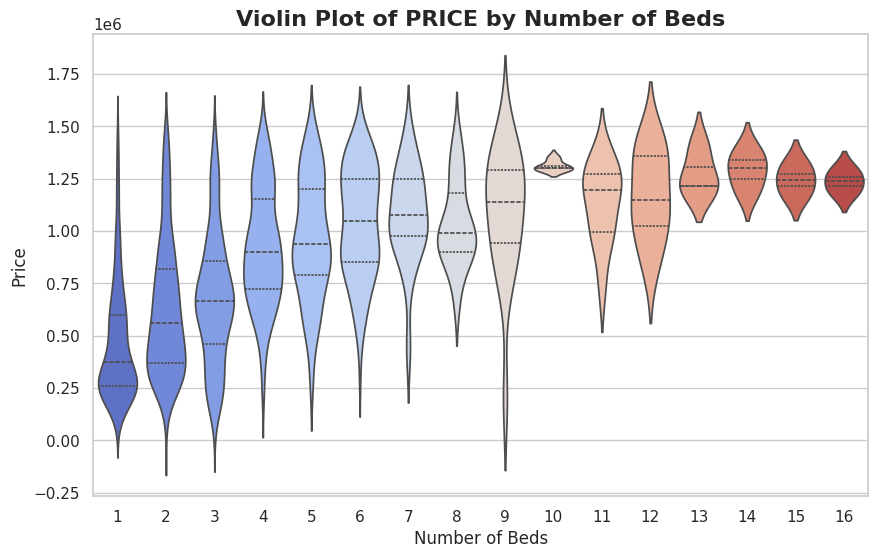

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='BEDS',
    y='PRICE',
    palette="coolwarm",
    inner="quartile"
)
plt.title('Violin Plot of PRICE by Number of Beds', fontsize=16, weight='bold')
plt.xlabel('Number of Beds', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show();


<ipython-input-7-b028eede41a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


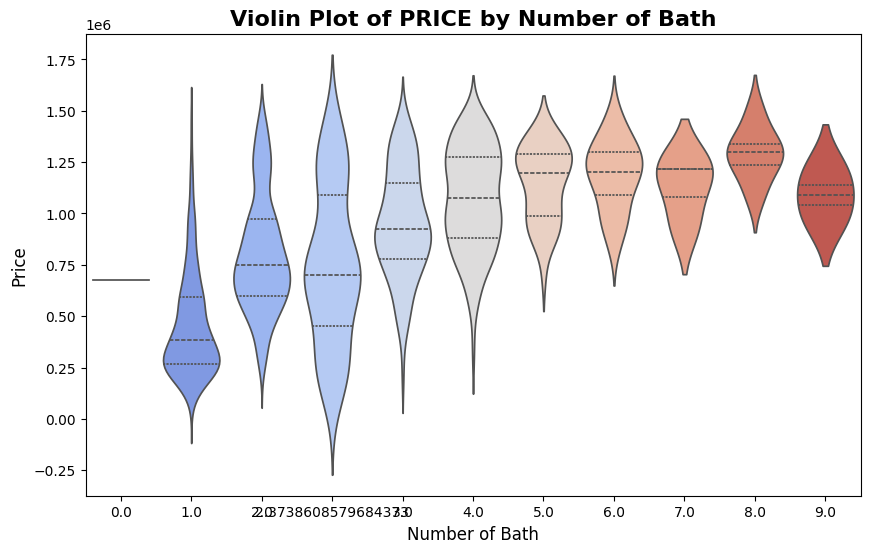

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='BATH',
    y='PRICE',
    palette="coolwarm",
    inner="quartile"
)
plt.title('Violin Plot of PRICE by Number of Bath', fontsize=16, weight='bold')
plt.xlabel('Number of Bath', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show();

In [ ]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="LATITUDE",
    lon="LONGITUDE",
    width=1200,  # Width of map
    height=600,  # Height of map
    color="PROPERTYSQFT",
    hover_data=["PROPERTYSQFT"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [ ]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="LATITUDE",
    lon="LONGITUDE",
    width=1200,  # Width of map
    height=600,  # Height of map
    color="PRICE",
    hover_data=["PRICE"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()